# From Perceptron to Deep Learning
## 2-Layer MLP from Scratch (NumPy Only)

Goals:
- Implement forward pass manually
- Implement full backpropagation
- Solve XOR problem
- Observe vanishing gradients (Sigmoid vs ReLU)


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Model Architecture

We build a 2-layer MLP:

Input → Hidden Layer → Output

Hidden layer:
\[
z_1 = XW_1 + b_1
\]
\[
a_1 = \sigma(z_1)
\]

Output layer:
\[
z_2 = a_1 W_2 + b_2
\]
\[
\hat{y} = \sigma(z_2)
\]

Loss (Binary Cross Entropy):
\[
L = -[y\log(\hat y) + (1-y)\log(1-\hat y)]
\]


In [2]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(a):
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)


In [3]:

class MLP:
    def __init__(self, input_size, hidden_size, output_size, activation="sigmoid"):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
        self.activation = activation

    def forward(self, X):
        self.X = X
        self.z1 = X @ self.W1 + self.b1

        if self.activation == "sigmoid":
            self.a1 = sigmoid(self.z1)
        else:
            self.a1 = relu(self.z1)

        self.z2 = self.a1 @ self.W2 + self.b2
        self.y_hat = sigmoid(self.z2)
        return self.y_hat

    def backward(self, y, lr=0.1):
        m = y.shape[0]
        delta2 = (self.y_hat - y)

        dW2 = self.a1.T @ delta2 / m
        db2 = np.mean(delta2, axis=0, keepdims=True)

        if self.activation == "sigmoid":
            delta1 = (delta2 @ self.W2.T) * sigmoid_deriv(self.a1)
        else:
            delta1 = (delta2 @ self.W2.T) * relu_deriv(self.z1)

        dW1 = self.X.T @ delta1 / m
        db1 = np.mean(delta1, axis=0, keepdims=True)

        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1


In [4]:

def loss(y, y_hat):
    eps = 1e-8
    return -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))


## XOR Dataset

In [5]:

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],[1],[1],[0]])


## Train on XOR

In [6]:

model = MLP(2, 4, 1, activation="sigmoid")
losses = []

for epoch in range(5000):
    y_hat = model.forward(X)
    model.backward(y, lr=0.5)
    l = loss(y, y_hat)
    losses.append(l)

    if epoch % 500 == 0:
        print(epoch, l)


0 0.7556736517170691
500 0.29571620891466466
1000 0.04094883239704191
1500 0.019818529663371904
2000 0.012856984889568525
2500 0.009452869449438024
3000 0.007448127951539228
3500 0.006131656191391997
4000 0.005202896633014232
4500 0.004513507082042408


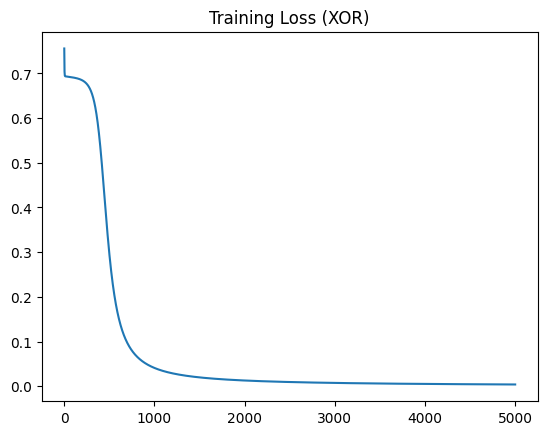

In [7]:

plt.plot(losses)
plt.title("Training Loss (XOR)")
plt.show()


In [8]:

print(np.round(model.forward(X), 3))


[[0.005]
 [0.996]
 [0.996]
 [0.004]]


If 0.5 is use as threshold then [0, 1, 1, 0]

## Tiny MNIST Experiment (Vanishing Gradient Demo)

In [9]:

from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)

X_m = mnist.data[:2000] / 255.0
y_m = (mnist.target[:2000].astype(int) == 0).astype(int).reshape(-1,1)


### Train with Sigmoid Hidden Layer

In [10]:

sigmoid_model = MLP(784, 64, 1, activation="sigmoid")
losses_sigmoid = []

for epoch in range(50):
    y_hat = sigmoid_model.forward(X_m)
    sigmoid_model.backward(y_m, lr=0.1)
    losses_sigmoid.append(loss(y_m, y_hat))


### Train with ReLU Hidden Layer

In [11]:

relu_model = MLP(784, 64, 1, activation="relu")
losses_relu = []

for epoch in range(50):
    y_hat = relu_model.forward(X_m)
    relu_model.backward(y_m, lr=0.1)
    losses_relu.append(loss(y_m, y_hat))


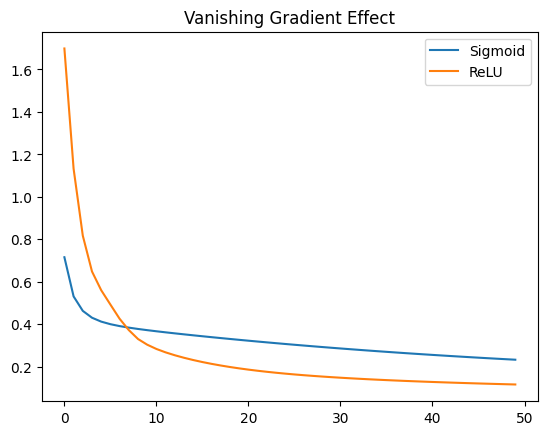

In [12]:

plt.plot(losses_sigmoid, label="Sigmoid")
plt.plot(losses_relu, label="ReLU")
plt.legend()
plt.title("Vanishing Gradient Effect")
plt.show()



## Observation

Sigmoid networks learn slowly because:

Gradients shrink every layer:

This is the **vanishing gradient problem**.

ReLU avoids this